In [1]:
# 1. Kerakli kutubxonalarni import qilish
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



In [10]:
# 2. Ma’lumotlarni CSV dan o‘qish
df = pd.read_csv('/content/employee_firing_dataset.csv')



In [11]:
# 3. Ma’lumotlarni ko‘rib chiqish
print("Boshidagi ma'lumotlar:")
print(df.head())



Boshidagi ma'lumotlar:
   EmployeeID  Experience_Years  Late_Arrivals_Per_Month  Productivity_Score  \
0           1                 5                        1                  85   
1           2                 1                        8                  50   
2           3                 3                        2                  75   
3           4                 2                        6                  60   
4           5                 6                        0                  90   

  Should_Fire  
0          No  
1         Yes  
2          No  
3         Yes  
4          No  


In [12]:
# 4. Label encoding: Yes/No ni 1/0 ga aylantirish
le = LabelEncoder()
df['Should_Fire'] = le.fit_transform(df['Should_Fire'])  # Yes -> 1, No -> 0



In [13]:
# 5. X (mustaqil o‘zgaruvchilar) va y (natija) ni ajratish
X = df[['Experience_Years', 'Late_Arrivals_Per_Month', 'Productivity_Score']]
y = df['Should_Fire']



In [14]:
# 6. Ma’lumotlarni o‘rgatish (train) va testga ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [15]:
# 7. Decision Tree modelini yaratish va o‘rgatish
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [16]:
# 8. Test ma’lumotlariga bashorat qilish
y_pred = dt_model.predict(X_test)


In [17]:

# 9. Model baholash
print("Decision Tree klassifikatsiyasi hisoboti:")
print(classification_report(y_test, y_pred))



Decision Tree klassifikatsiyasi hisoboti:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



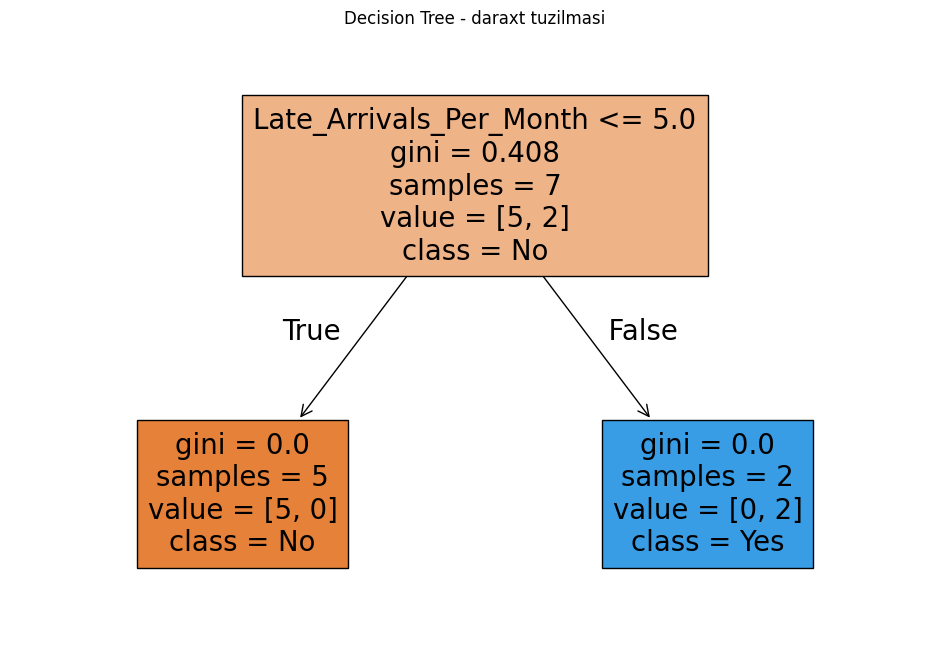

In [18]:
# 10. Daraxtni chizish
plt.figure(figsize=(12,8))
plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree - daraxt tuzilmasi")
plt.show()
